In [1]:
!pip install  fastparquet

In [2]:
!pip install pyarrow

In [3]:
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
import itertools as it

from copy import deepcopy
%matplotlib inline

import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sns # plotting the data
import matplotlib.pyplot as plt # plotting the data

from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [4]:
df = pq.read_table(source='train.parquet').to_pandas()
df1 = pq.read_table(source='test.parquet').to_pandas()

#Convert them into pandas DataFrame as df

In [5]:
df = pd.DataFrame(df)
df1 = pd.DataFrame(df1)

In [6]:
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [7]:
df = pd.get_dummies(df, columns=['Incident'])

In [8]:
df.shape, df1.shape

((3220868, 59), (1065524, 3))

##Checking the null values

In [9]:
df.isnull().sum(), df1.isnull().sum()

(Patient-Uid                   0
 Date                          0
 Incident_DRUG_TYPE_0          0
 Incident_DRUG_TYPE_1          0
 Incident_DRUG_TYPE_10         0
 Incident_DRUG_TYPE_11         0
 Incident_DRUG_TYPE_12         0
 Incident_DRUG_TYPE_13         0
 Incident_DRUG_TYPE_14         0
 Incident_DRUG_TYPE_15         0
 Incident_DRUG_TYPE_16         0
 Incident_DRUG_TYPE_17         0
 Incident_DRUG_TYPE_18         0
 Incident_DRUG_TYPE_2          0
 Incident_DRUG_TYPE_3          0
 Incident_DRUG_TYPE_4          0
 Incident_DRUG_TYPE_5          0
 Incident_DRUG_TYPE_6          0
 Incident_DRUG_TYPE_7          0
 Incident_DRUG_TYPE_8          0
 Incident_DRUG_TYPE_9          0
 Incident_PRIMARY_DIAGNOSIS    0
 Incident_SYMPTOM_TYPE_0       0
 Incident_SYMPTOM_TYPE_1       0
 Incident_SYMPTOM_TYPE_10      0
 Incident_SYMPTOM_TYPE_11      0
 Incident_SYMPTOM_TYPE_12      0
 Incident_SYMPTOM_TYPE_13      0
 Incident_SYMPTOM_TYPE_14      0
 Incident_SYMPTOM_TYPE_15      0
 Incident_

#Dropping the duplicates

In [10]:
df = df.drop_duplicates(); df1 = df1.drop_duplicates()

In [11]:
df.shape, df.shape

((3185297, 59), (3185297, 59))

#Here some different between before shape of the dropped duplicates and after the dropped duplicates shaps.

Counting the unique values

In [12]:
df.nunique()

Patient-Uid                   27033
Date                           1977
Incident_DRUG_TYPE_0              2
Incident_DRUG_TYPE_1              2
Incident_DRUG_TYPE_10             2
Incident_DRUG_TYPE_11             2
Incident_DRUG_TYPE_12             2
Incident_DRUG_TYPE_13             2
Incident_DRUG_TYPE_14             2
Incident_DRUG_TYPE_15             2
Incident_DRUG_TYPE_16             2
Incident_DRUG_TYPE_17             2
Incident_DRUG_TYPE_18             2
Incident_DRUG_TYPE_2              2
Incident_DRUG_TYPE_3              2
Incident_DRUG_TYPE_4              2
Incident_DRUG_TYPE_5              2
Incident_DRUG_TYPE_6              2
Incident_DRUG_TYPE_7              2
Incident_DRUG_TYPE_8              2
Incident_DRUG_TYPE_9              2
Incident_PRIMARY_DIAGNOSIS        2
Incident_SYMPTOM_TYPE_0           2
Incident_SYMPTOM_TYPE_1           2
Incident_SYMPTOM_TYPE_10          2
Incident_SYMPTOM_TYPE_11          2
Incident_SYMPTOM_TYPE_12          2
Incident_SYMPTOM_TYPE_13    

#Checking the Datatypes in the given data

In [13]:
df.dtypes, df1.dtypes

(Patient-Uid                           object
 Date                          datetime64[ns]
 Incident_DRUG_TYPE_0                   uint8
 Incident_DRUG_TYPE_1                   uint8
 Incident_DRUG_TYPE_10                  uint8
 Incident_DRUG_TYPE_11                  uint8
 Incident_DRUG_TYPE_12                  uint8
 Incident_DRUG_TYPE_13                  uint8
 Incident_DRUG_TYPE_14                  uint8
 Incident_DRUG_TYPE_15                  uint8
 Incident_DRUG_TYPE_16                  uint8
 Incident_DRUG_TYPE_17                  uint8
 Incident_DRUG_TYPE_18                  uint8
 Incident_DRUG_TYPE_2                   uint8
 Incident_DRUG_TYPE_3                   uint8
 Incident_DRUG_TYPE_4                   uint8
 Incident_DRUG_TYPE_5                   uint8
 Incident_DRUG_TYPE_6                   uint8
 Incident_DRUG_TYPE_7                   uint8
 Incident_DRUG_TYPE_8                   uint8
 Incident_DRUG_TYPE_9                   uint8
 Incident_PRIMARY_DIAGNOSIS       

#Grouping them in the order of patiend uid and incident

In [14]:
df.groupby('Patient-Uid').max()

,Date,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,Incident_DRUG_TYPE_15,Incident_DRUG_TYPE_16,...,Incident_SYMPTOM_TYPE_7,Incident_SYMPTOM_TYPE_8,Incident_SYMPTOM_TYPE_9,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2020-03-29,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2019-04-05,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2020-07-10,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2020-08-12,1,1,0,1,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-30,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-08-10,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


###Sort them by Date

In [15]:
df.sort_values(by = ['Date'], inplace=True)

In [16]:
df

,Patient-Uid,Date,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,Incident_DRUG_TYPE_15,...,Incident_SYMPTOM_TYPE_7,Incident_SYMPTOM_TYPE_8,Incident_SYMPTOM_TYPE_9,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5
2222167,a0e2d262-1c7c-11ec-93d9-16262ee38c7f,2015-04-07,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2931211,a0e7e340-1c7c-11ec-97ca-16262ee38c7f,2015-04-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2609406,a0e2bb12-1c7c-11ec-bc94-16262ee38c7f,2015-04-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2609409,a0e1fd77-1c7c-11ec-a1d2-16262ee38c7f,2015-04-07,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2765911,a0e1fa82-1c7c-11ec-b072-16262ee38c7f,2015-04-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23132677,a0eb2a57-1c7c-11ec-b755-16262ee38c7f,2020-09-03,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934130,a0ebbc15-1c7c-11ec-b4be-16262ee38c7f,2020-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21170875,a0f048fb-1c7c-11ec-82c9-16262ee38c7f,2020-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2450641,a0e65375-1c7c-11ec-93c4-16262ee38c7f,2020-09-03,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.shape

(3185297, 59)

In [18]:
# # Missing data
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Users\GK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Date'>

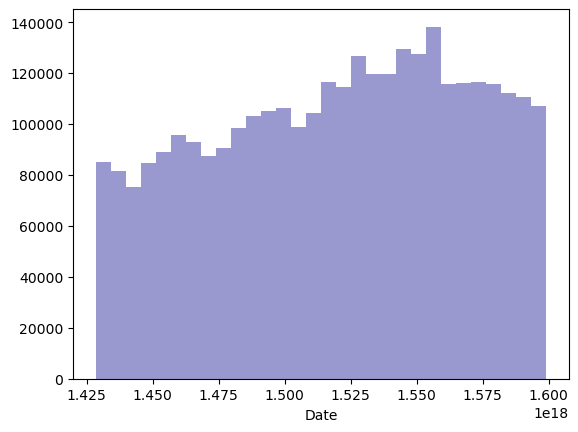

In [19]:
sns.distplot(df['Date'].dropna(), kde=False, color='darkblue', bins=30)

### Filter data between two dates

###Display the filtered data

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
  
# Filter data between two dates
filtered_df = df.loc[(df['Date'] >= '2020-09-01')
                     & (df['Date'] < '2020-09-15')]
# Display
filtered_df

,Patient-Uid,Date,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,Incident_DRUG_TYPE_15,...,Incident_SYMPTOM_TYPE_7,Incident_SYMPTOM_TYPE_8,Incident_SYMPTOM_TYPE_9,Incident_TARGET DRUG,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5
22136434,a0ea1c89-1c7c-11ec-aa53-16262ee38c7f,2020-09-01,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11752125,a0ed8527-1c7c-11ec-97ec-16262ee38c7f,2020-09-01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
688186,a0e1c097-1c7c-11ec-85f6-16262ee38c7f,2020-09-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2491,a0dd3d4b-1c7c-11ec-93d9-16262ee38c7f,2020-09-01,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
809190,a0df610e-1c7c-11ec-a537-16262ee38c7f,2020-09-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23132677,a0eb2a57-1c7c-11ec-b755-16262ee38c7f,2020-09-03,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934130,a0ebbc15-1c7c-11ec-b4be-16262ee38c7f,2020-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21170875,a0f048fb-1c7c-11ec-82c9-16262ee38c7f,2020-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2450641,a0e65375-1c7c-11ec-93c4-16262ee38c7f,2020-09-03,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_data = filtered_df.copy()

In [22]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['Patient-Uid', 'Date', 'Incident_DRUG_TYPE_0', 'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10', 'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12', 'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14', 'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16', 'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_18', 'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3', 'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6', 'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9', 'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0', 'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10', 'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12', 'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14', 'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16', 'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18', 'Incident_SYMPTOM_TYPE_19', 'Incident_SYMPTOM_TYPE_2', 'Incident_SYMPTOM_TYPE_20', 'Incident_SYMPTOM_TYPE_21', 'Incident_SYMPTOM_TYPE_22', 'Incident_SYMPTOM_TYPE_23', 'Inciden

In [23]:
b.remove('Patient-Uid')
b.remove('Date')
print(b)

['Incident_DRUG_TYPE_0', 'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10', 'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12', 'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14', 'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16', 'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_18', 'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3', 'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6', 'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9', 'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0', 'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10', 'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12', 'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14', 'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16', 'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18', 'Incident_SYMPTOM_TYPE_19', 'Incident_SYMPTOM_TYPE_2', 'Incident_SYMPTOM_TYPE_20', 'Incident_SYMPTOM_TYPE_21', 'Incident_SYMPTOM_TYPE_22', 'Incident_SYMPTOM_TYPE_23', 'Incident_SYMPTOM_TYPE_24', 'In

## Array of features

In [24]:
X = df[b].values #array of features
#y = df['Patient-Uid'].values

In [25]:
df0 = df.iloc[2, :]
df0

Patient-Uid                   a0e2bb12-1c7c-11ec-bc94-16262ee38c7f
Date                                           2015-04-07 00:00:00
Incident_DRUG_TYPE_0                                             0
Incident_DRUG_TYPE_1                                             0
Incident_DRUG_TYPE_10                                            0
Incident_DRUG_TYPE_11                                            0
Incident_DRUG_TYPE_12                                            0
Incident_DRUG_TYPE_13                                            0
Incident_DRUG_TYPE_14                                            0
Incident_DRUG_TYPE_15                                            0
Incident_DRUG_TYPE_16                                            0
Incident_DRUG_TYPE_17                                            0
Incident_DRUG_TYPE_18                                            0
Incident_DRUG_TYPE_2                                             0
Incident_DRUG_TYPE_3                                          

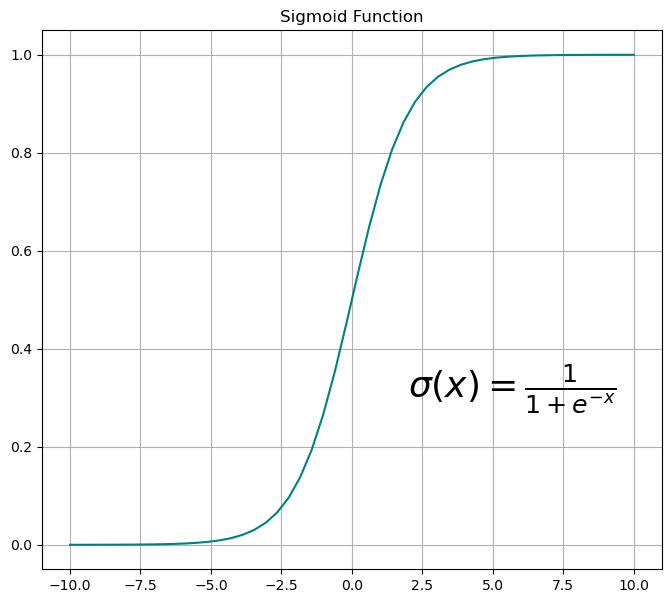

In [35]:

def sigmoid(x):
  return(1/(1 + np.exp(-x)))

x_values_for_sigmoid = np.linspace(-10, 10)
plt.figure(figsize=(8, 7))
plt.plot(x_values_for_sigmoid, sigmoid(x_values_for_sigmoid), c='teal')
plt.title('Sigmoid Function')
plt.grid(True)
plt.text(2, 0.3, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=26)
plt.show()

In [ ]:
df_1